<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/AXISBANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.
install.packages("ranger")
install.packages("e1071")
install.packages("LiblineaR")
install.packages("caret")
install.packages("TSstudio")
install.packages("vars")
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘RcppArmadillo’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtes

# New Section

In [5]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)
library(ranger)
library(e1071)
library(caret)
library(LiblineaR)
library(TSstudio)
library(data.table)
library(vars)
library("vars")
library(xgboost)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘PerformanceAnalytics’


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness


The following object is masked from ‘package:graphics’:

    legend



Attaching package: ‘TSA’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Loading required package: timeDate


Attaching

In [92]:
# Download data from Yahoo Finance
AxisBank<-getSymbols("AXISBANK.NS",from="2016-12-31",auto.assign=FALSE)


           AXISBANK.NS.Open AXISBANK.NS.High AXISBANK.NS.Low AXISBANK.NS.Close
2017-01-02            451.4           452.00          441.25            447.75
2017-01-03            449.6           457.80          443.50            455.25
2017-01-04            455.0           460.00          451.95            453.10
2017-01-05            454.6           463.90          453.25            458.05
2017-01-06            459.7           461.80          454.05            455.20
2017-01-09            456.9           459.35          451.55            452.75
           AXISBANK.NS.Volume AXISBANK.NS.Adjusted
2017-01-02            3054394             442.8436
2017-01-03            4621782             450.2615
2017-01-04            3703873             448.1350
2017-01-05            5829373             453.0308
2017-01-06            4431212             450.2120
2017-01-09            2690456             447.7888

           AXISBANK.NS.Open AXISBANK.NS.High AXISBANK.NS.Low AXISBANK.NS.Close
2022-04-20           800.85           802.45          788.60             794.7
2022-04-21           795.10           804.00          790.55             801.8
2022-04-22           796.00           798.00          778.20             780.6
2022-04-25           772.00           788.80          761.25             780.7
2022-04-26           791.00           796.60          769.00             775.0
2022-04-27           765.60           772.95          749.00             765.9
           AXISBANK.NS.Volume AXISBANK.NS.Adjusted
2022-04-20            6676491                794.7
2022-04-21            6851615                801.8
2022-04-22            6255027                780.6
2022-04-25            8023525                780.7
2022-04-26           11087204                775.0
2022-04-27           11485697                765.9

     Index            AXISBANK.NS.Open AXISBANK.NS.High AXISBANK.NS.Low
 Min.   :2017-01-02   Min.   :293.5    Min.   :337.5    Min.   :286.0  
 1st Qu.:2018-04-30   1st Qu.:512.6    1st Qu.:517.7    1st Qu.:506.3  
 Median :2019-09-01   Median :622.3    Median :630.4    Median :615.4  
 Mean   :2019-08-30   Mean   :617.8    Mean   :626.1    Mean   :608.6  
 3rd Qu.:2020-12-28   3rd Qu.:733.9    3rd Qu.:742.8    3rd Qu.:723.9  
 Max.   :2022-04-27   Max.   :848.4    Max.   :866.9    Max.   :825.5  
 AXISBANK.NS.Close AXISBANK.NS.Volume AXISBANK.NS.Adjusted
 Min.   :303.1     Min.   :  793433   Min.   :303.1       
 1st Qu.:511.9     1st Qu.: 6343016   1st Qu.:509.2       
 Median :620.5     Median : 9208877   Median :620.2       
 Mean   :617.3     Mean   :13321759   Mean   :616.5       
 3rd Qu.:733.0     3rd Qu.:15679852   3rd Qu.:732.5       
 Max.   :845.1     Max.   :96186227   Max.   :845.1       

[1] 1314    6

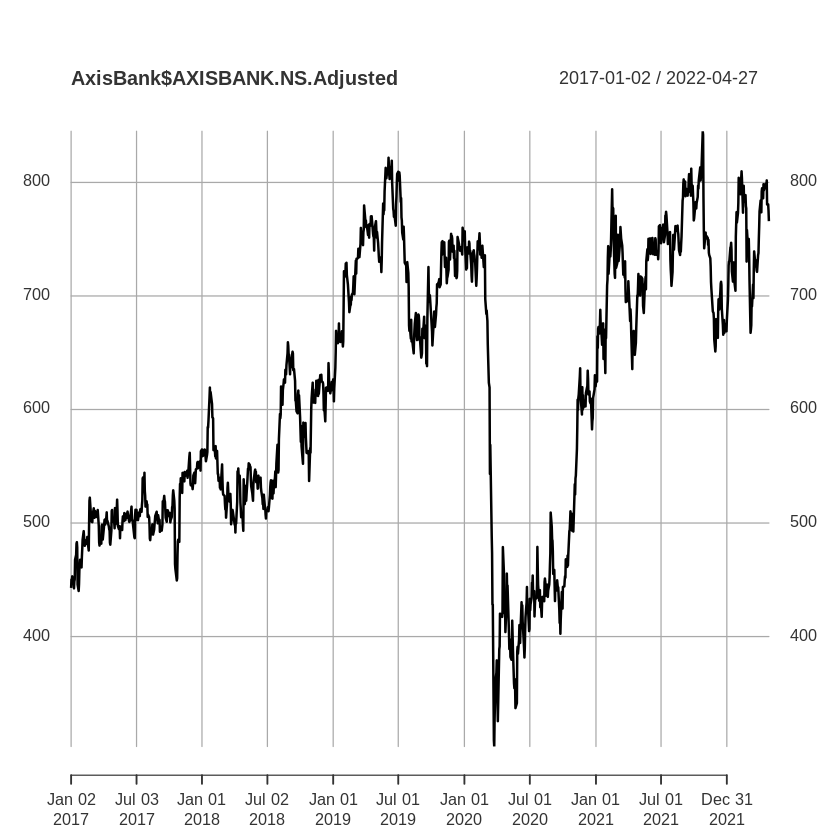

In [93]:
# Plotting the data downloaded from Yahoo Finance (Time Series Data)
head(AxisBank)
tail(AxisBank)
plot(AxisBank$AXISBANK.NS.Adjusted)
summary(AxisBank)# To understand any missing values in any columns
AxisBank<-na.omit(AxisBank)# Remove the rows containing the missing data
AxisBank<-AxisBank[AxisBank$AXISBANK.NS.Volume>0,]
dim(AxisBank)

In [96]:
# Computing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
AxisBank_returns<-Return.calculate(AxisBank$AXISBANK.NS.Adjusted,method = "log")
head(AxisBank_returns)


           AXISBANK.NS.Adjusted
2017-01-02                   NA
2017-01-03          0.016611746
2017-01-04         -0.004733921
2017-01-05          0.010865482
2017-01-06         -0.006241368
2017-01-09         -0.005396861

In [97]:
# Removing the blank rows
AxisBank_returns<-na.omit(AxisBank_returns)

In [98]:
Prices<-AxisBank[,6]
returns<-AxisBank_returns
Prices<- na.omit(Prices)
returns<-na.omit(returns)



In [99]:
head(Prices)
head(returns)

           AXISBANK.NS.Adjusted
2017-01-02             442.8436
2017-01-03             450.2615
2017-01-04             448.1350
2017-01-05             453.0308
2017-01-06             450.2120
2017-01-09             447.7888

           AXISBANK.NS.Adjusted
2017-01-03          0.016611746
2017-01-04         -0.004733921
2017-01-05          0.010865482
2017-01-06         -0.006241368
2017-01-09         -0.005396861
2017-01-10         -0.011998793

------------------------------------------------------------------------------ 
Describe as.data.frame(Prices) (data.frame):

data frame:	1314 obs. of  1 variables
		1314 complete cases (100.0%)

  Nr  ColName               Class    NAs  Levels
  1   AXISBANK.NS.Adjusted  numeric  .          


------------------------------------------------------------------------------ 
1 - AXISBANK.NS.Adjusted (numeric)

    length         n       NAs    unique        0s      mean    meanCI'
     1'314     1'314         0     1'235         0  616.4756  609.8820
              100.0%      0.0%                0.0%            623.0692
                                                                      
       .05       .10       .25    median       .75       .90       .95
  427.1425  450.5130  509.2294  620.1798  732.4553  762.7660  789.3400
                                                                      
     range        sd     vcoef       mad       IQR      skew      kurt
  541.9500  121.834

------------------------------------------------------------------------------ 
Describe as.data.frame(returns) (data.frame):

data frame:	1313 obs. of  1 variables
		1313 complete cases (100.0%)

  Nr  ColName               Class    NAs  Levels
  1   AXISBANK.NS.Adjusted  numeric  .          


------------------------------------------------------------------------------ 
1 - AXISBANK.NS.Adjusted (numeric)

         length              n            NAs        unique            0s'
          1'313          1'313              0         1'311             2
                        100.0%           0.0%                        0.2%
                                                                         
            .05            .10            .25        median           .75
  -0.0317222393  -0.0221982668  -0.0109039366  0.0001296466  0.0119332152
                                                                         
          range             sd          vcoef           mad         

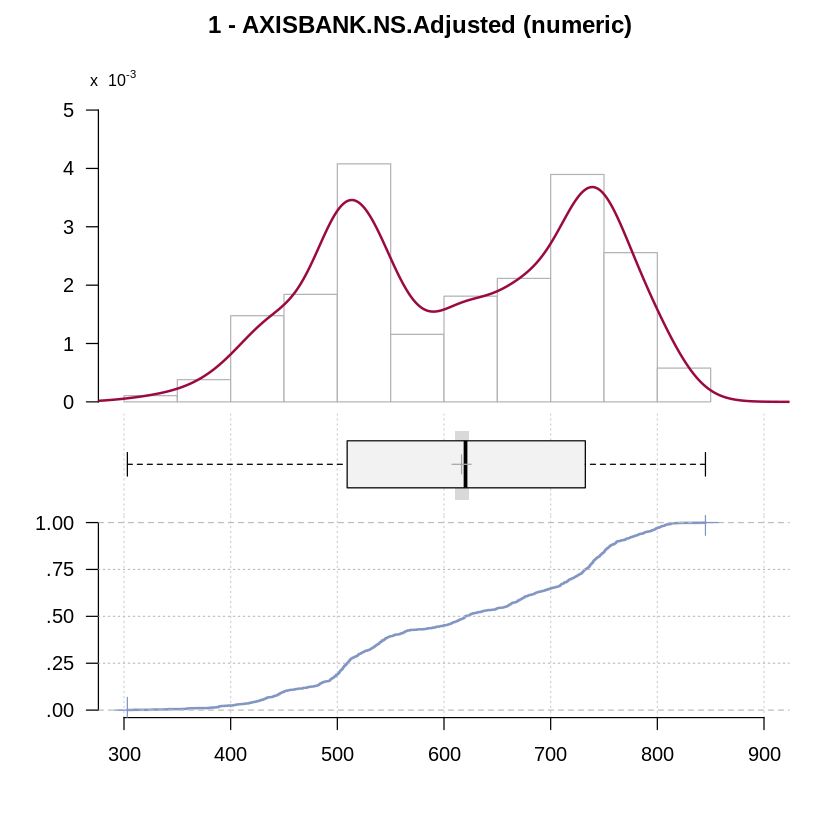

,AXISBANK.NS.Adjusted
,<dbl>
nobs,1314.000000
NAs,0.000000
Minimum,303.149994
Maximum,845.099976
1. Quartile,509.229378
3. Quartile,732.455261
Mean,616.475586
Median,620.179779
Sum,810048.919544


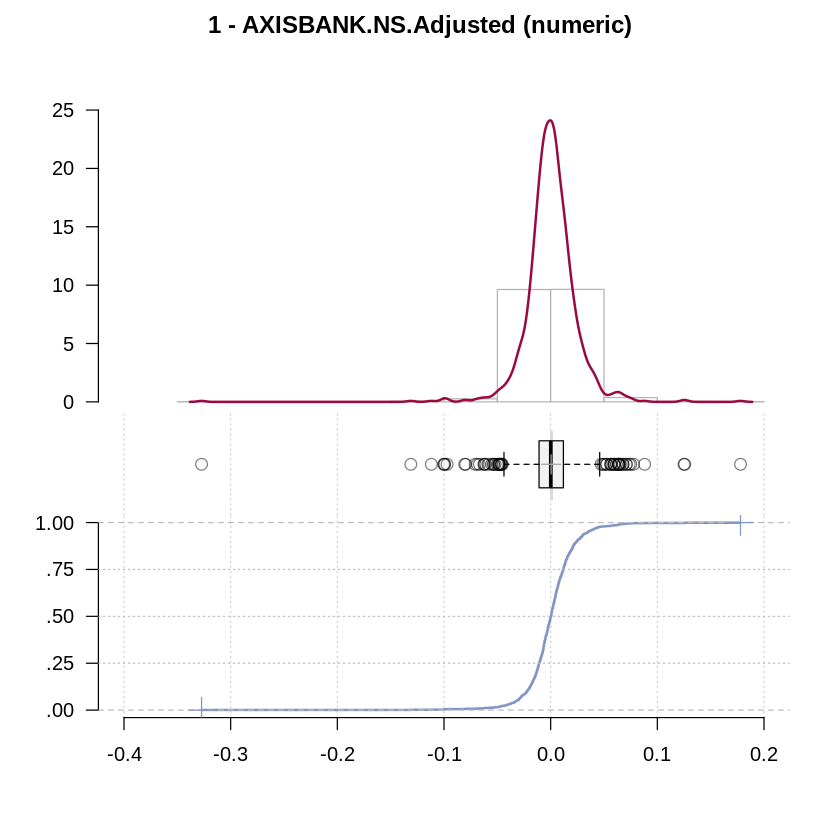

In [100]:
#Exploratory Data Analysis
#Calculating descriptive statistics
Desc(as.data.frame(Prices))
Desc(as.data.frame(returns))
basicStats(Prices)


In [101]:
#Test of Normality
jarqueberaTest(Prices$AXISBANK.NS.Adjusted)
jarqueberaTest(returns$AXISBANK.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 84.9364
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 28 18:10:29 2022 by user: 


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 50986.7742
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 28 18:10:29 2022 by user: 


In [102]:
shapiroTest(Prices$AXISBANK.NS.Adjusted)
shapiroTest(returns$AXISBANK.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9447
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 28 18:10:36 2022 by user: 


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.8511
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 28 18:10:37 2022 by user: 


In [103]:
# Tests of Stationarity
summary(ur.df(Prices$AXISBANK.NS.Adjusted))
summary(ur.df(returns$AXISBANK.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.571   -6.445   -0.018    6.924   62.953 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
z.lag.1     0.0001621  0.0005739   0.282    0.778
z.diff.lag -0.0118889  0.0276397  -0.430    0.667

Residual standard error: 13.06 on 1310 degrees of freedom
Multiple R-squared:  0.0001968,	Adjusted R-squared:  -0.00133 
F-statistic: 0.1289 on 2 and 1310 DF,  p-value: 0.879


Value of test-statistic is: 0.2824 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32747 -0.01092  0.00017  0.01197  0.17747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.006202   0.039175 -25.685   <2e-16 ***
z.diff.lag  0.001991   0.027638   0.072    0.943    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02419 on 1309 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5013 
F-statistic: 659.9 on 2 and 1309 DF,  p-value: < 2.2e-16


Value of test-statistic is: -25.6851 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [104]:
summary(ur.kpss(Prices$AXISBANK.NS.Adjusted))
summary(ur.kpss(returns$AXISBANK.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 4.7341 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.049 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.051 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


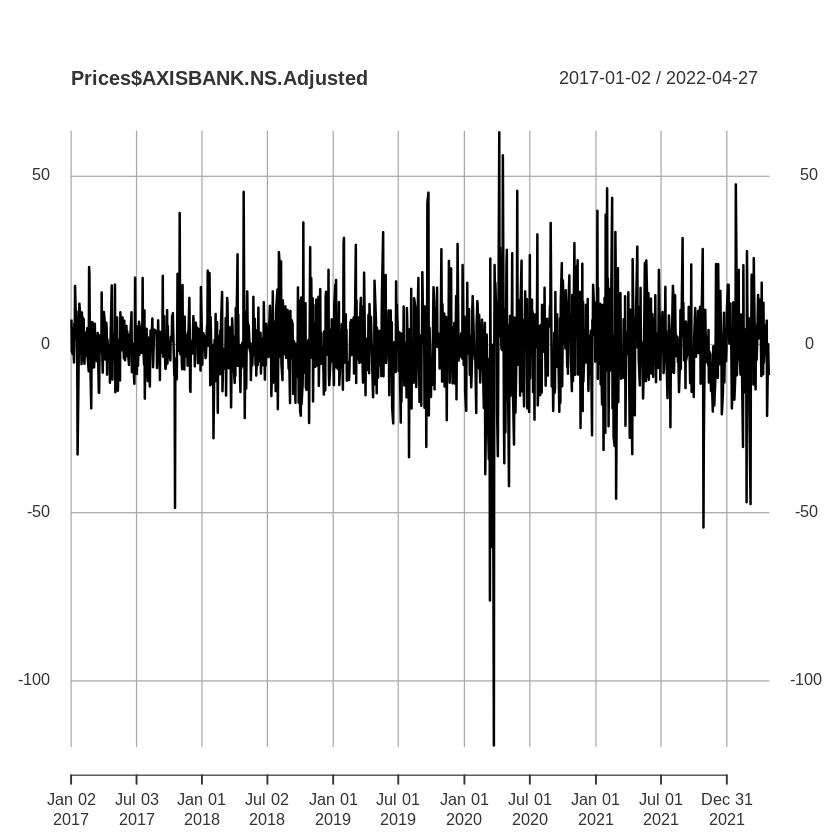

In [105]:
# Make it stationary
# Differencing the data

Prices<-diff(Prices)
plot(Prices$AXISBANK.NS.Adjusted)
summary(ur.kpss(Prices$AXISBANK.NS.Adjusted))
Prices<-na.omit(Prices)

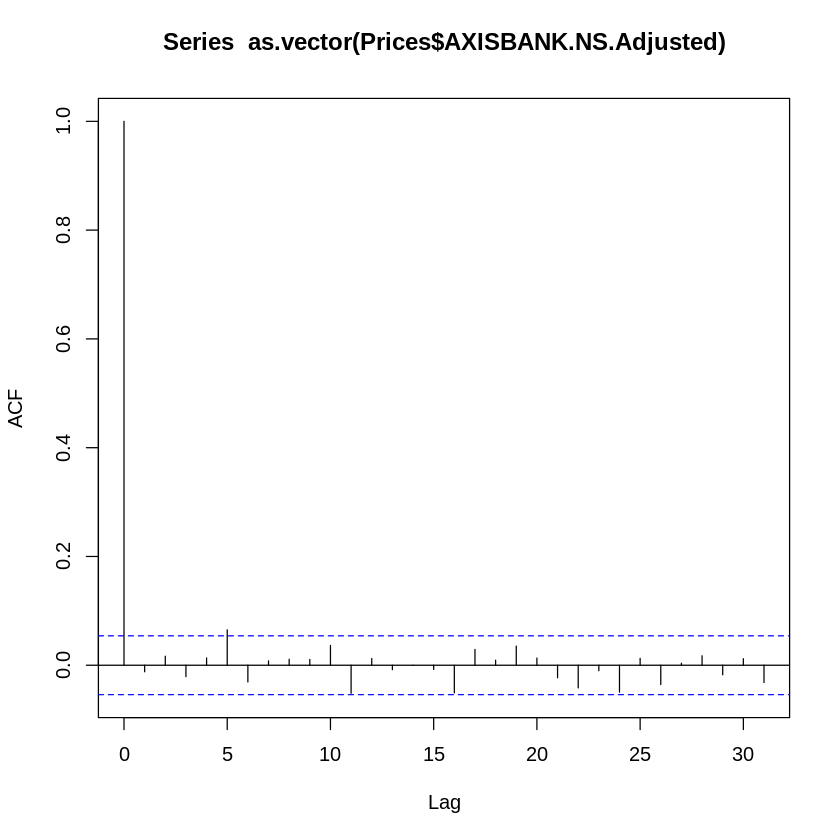

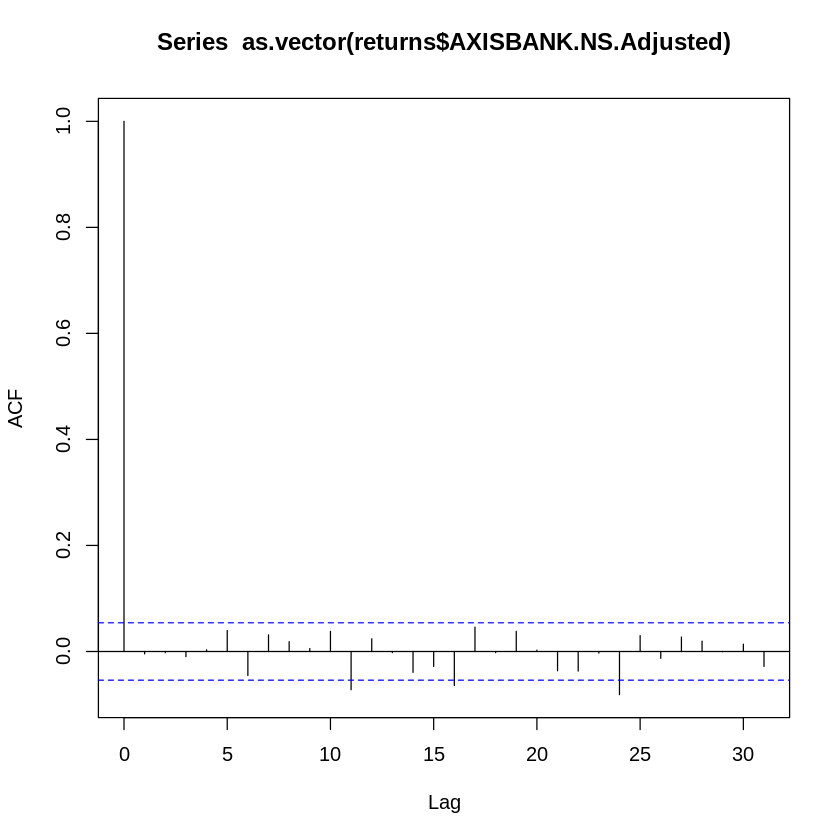

In [106]:
# Auto correlation plots - Advised on Stationary data
stats::acf(as.vector(Prices$AXISBANK.NS.Adjusted))
stats::acf(as.vector(returns$AXISBANK.NS.Adjusted))

In [107]:

Box.test(as.vector(Prices$AXISBANK.NS.Adjusted), lag =10, type = "Ljung-Box")
Box.test(as.vector(returns$AXISBANK.NS.Adjusted), lag =10, type = "Ljung-Box")



	Box-Ljung test

data:  as.vector(Prices$AXISBANK.NS.Adjusted)
X-squared = 10.353, df = 10, p-value = 0.4101



	Box-Ljung test

data:  as.vector(returns$AXISBANK.NS.Adjusted)
X-squared = 8.6284, df = 10, p-value = 0.5677


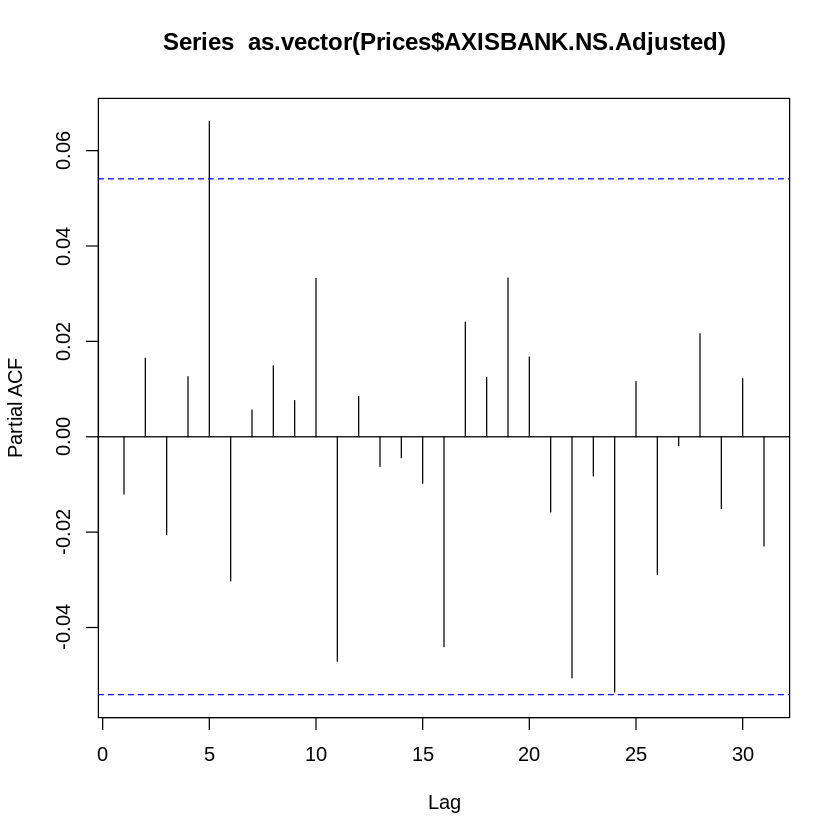

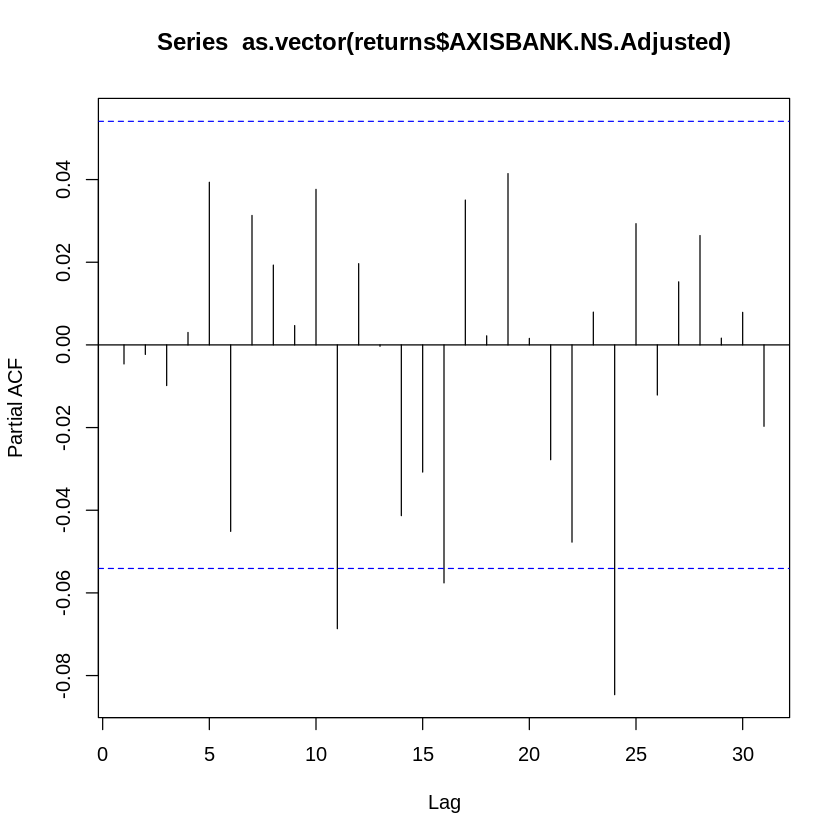

In [108]:
# Partial Autocorrelation Function
pacf(as.vector(Prices$AXISBANK.NS.Adjusted))
pacf(as.vector(returns$AXISBANK.NS.Adjusted))

In [109]:
model1<-auto.arima(as.vector(Prices$AXISBANK.NS.Adjusted),max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
model2<-auto.arima(as.vector(returns$AXISBANK.NS.Adjusted),max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)



 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : 10474.5
 ARIMA(1,0,0) with non-zero mean : 10477.02
 ARIMA(0,0,1) with non-zero mean : 10476.33
 ARIMA(0,0,0) with zero mean     : 10472.96
 ARIMA(1,0,1) with non-zero mean : 10478.61

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,0,0) with zero mean     : 10472.96

 Best model: ARIMA(0,0,0) with zero mean     


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : -6047.266
 ARIMA(1,0,0) with non-zero mean : -6044.734
 ARIMA(0,0,1) with non-zero mean : -6045.285
 ARIMA(0,0,0) with zero mean     : -6048.881
 ARIMA(1,0,1) with non-zero mean : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,0,0) with zero mean     : -6048.881

 Best model: ARIMA(0,0,0) with zero mean     




	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with zero mean
Q* = 10.353, df = 10, p-value = 0.4101

Model df: 0.   Total lags used: 10



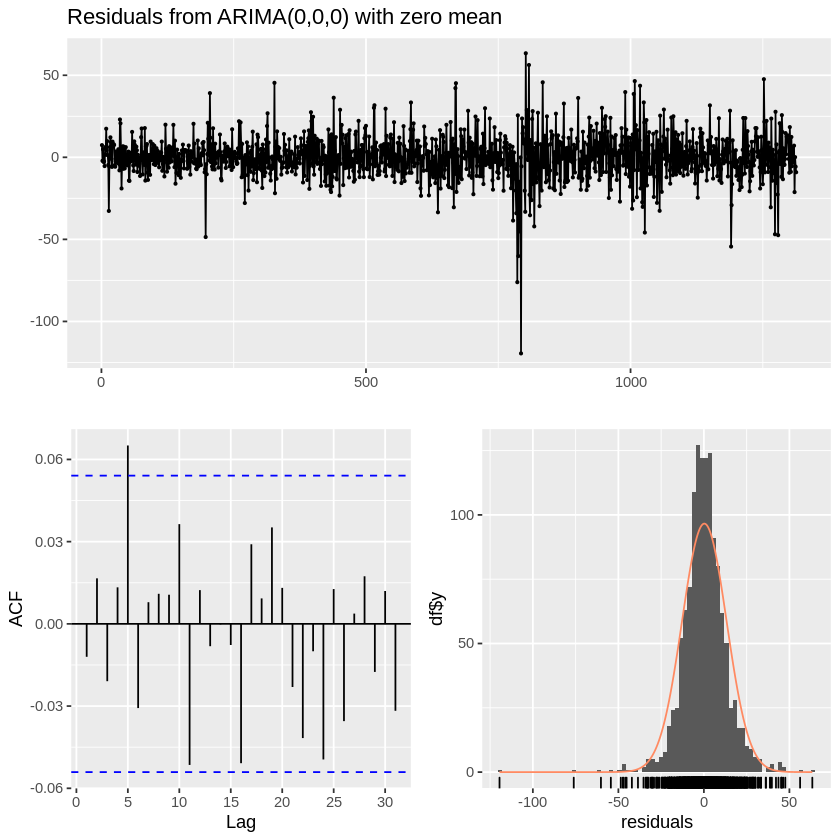


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with zero mean
Q* = 8.6284, df = 10, p-value = 0.5677

Model df: 0.   Total lags used: 10



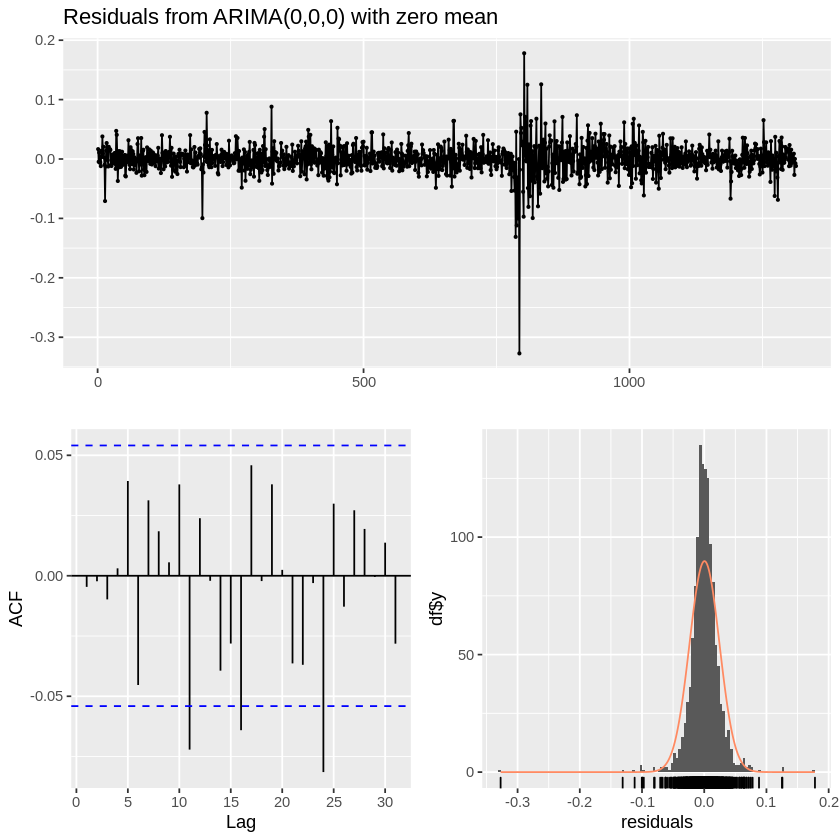

In [110]:
checkresiduals(model1)
checkresiduals(model2)

In [111]:
accuracy(model1)
accuracy(model2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.2460445,13.04597,9.203477,100,100,0.6820601,-0.01201887


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0004172391,0.02415753,0.01572218,100,100,0.6821908,-0.004599938


[1] 14.25691

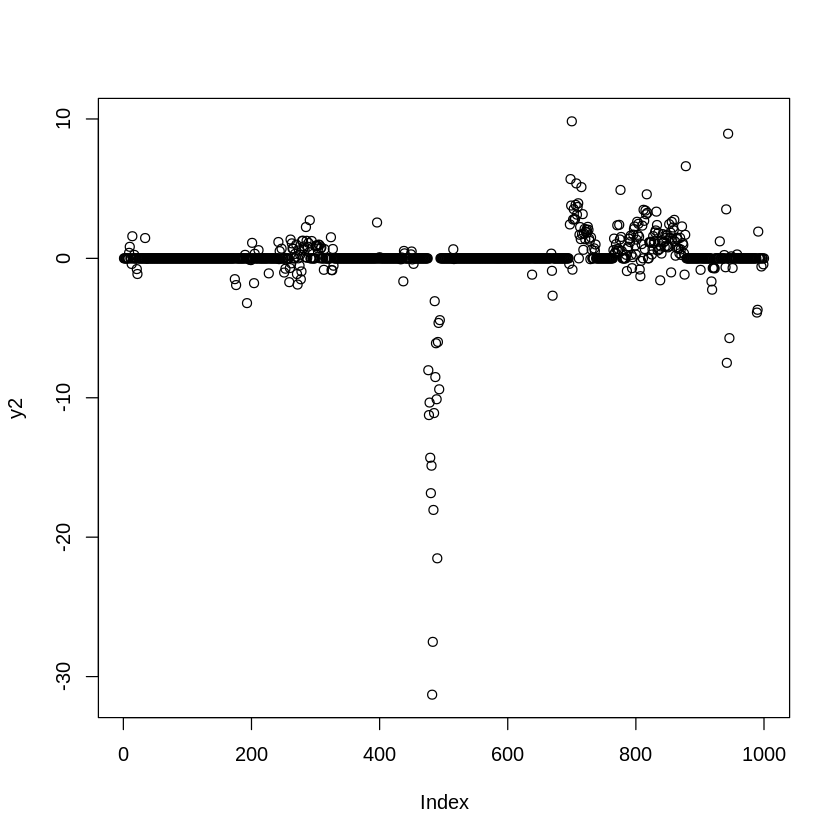

In [112]:
# ARIMA without BC
# Training and Testing Data

# Rolling window based reliance price prediction - Test window is 1000 days - 1day drift
y2<-c()
numrows <-nrow(Prices)
for (i in 1:1000) {
  
  model2<-auto.arima(as.vector(Prices$AXISBANK.NS.Adjusted[i:(i+numrows-1001)]),max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(Prices$AXISBANK.NS.Adjusted,1000)) 

[1]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [6]  0.000000e+00  0.000000e+00 -6.766685e-03  6.962415e-04  1.573653e-03
  [11]  0.000000e+00  5.351164e-04 -9.416513e-04  3.780615e-03  0.000000e+00
  [16]  0.000000e+00  6.310530e-04  0.000000e+00  0.000000e+00  0.000000e+00
  [21] -1.656473e-03 -2.344231e-03  0.000000e+00  0.000000e+00  0.000000e+00
  [26]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [31]  0.000000e+00  0.000000e+00  2.109099e-03  2.331345e-03  1.025397e-04
  [36] -4.149508e-05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [41]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [46]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [51]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [56]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [61]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [66]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [71]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [76]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [81]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [86]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [91]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  [96]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [101]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [106]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [111]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [116]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [121]  7.106526e-04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [126]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [131]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [136]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [141]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [146]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [151]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [156]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [161]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [166]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [171]  0.000000e+00  0.000000e+00  0.000000e+00 -2.050988e-03  0.000000e+00
 [176] -5.611598e-03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [181]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [186]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [191]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -2.194451e-03
 [196] -1.130468e-04 -1.318028e-04  0.000000e+00 -2.390647e-04  6.316724e-04
 [201]  1.673777e-03 -5.122549e-05  0.000000e+00 -2.869451e-03  4.529846e-04
 [206] -4.124398e-04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [211]  1.018966e-03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [216]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [221]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [226]  0.000000e+00 -1.686723e-03  0.000000e+00  0.000000e+00  0.000000e+00
 [231]  0.000000e+00  0.000000e+00  0.000000e+00 -1.438290e-03  0.000000e+00
 [236]  4.557972e-04 -1.153362e-04  0.000000e+00 -1.304397e-03 -3.974481e-04
 [241] -2.626510e-03  1.636038e-03 -6.986758e-05  7.416033e-04 -1.084884e-05
 [246] -7.409984e-06  9.915351e-04 -1.012346e-03  2.220646e-04  1.093111e-03
 [251] -1.424925e-03  5.197778e-05 -1.033982e-03 -1.120456e-04  1.981628e-03
 [256]  4.773668e-04  9.758830e-05  1.541910e-03 -2.379417e-03 -9.647118e-04

[1] 0.02679208

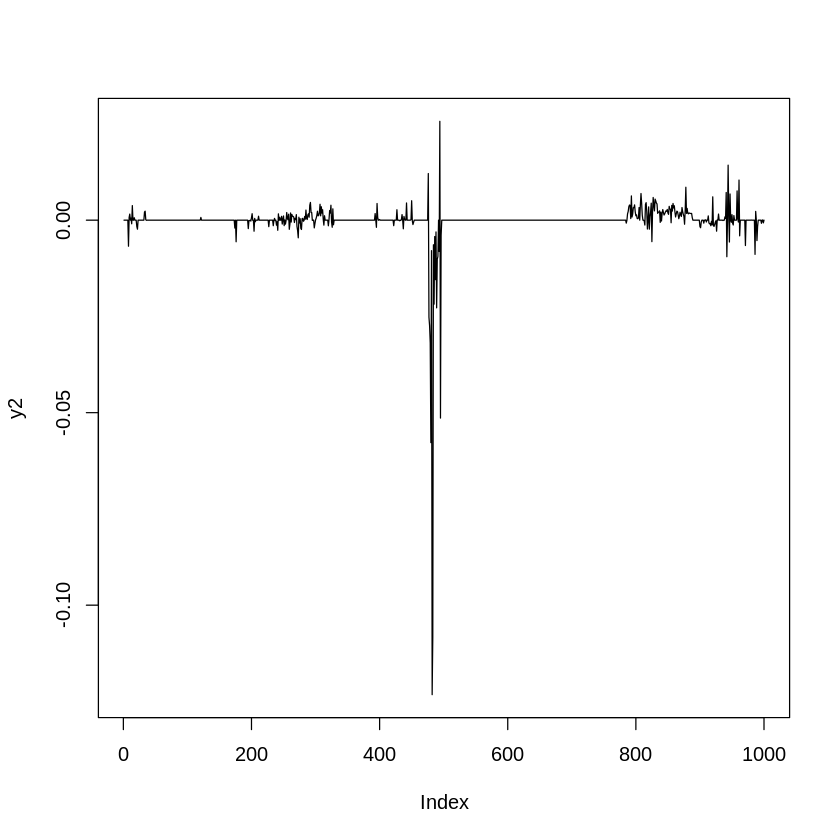

In [113]:
# Rolling window based reliance returns prediction - Test window is 1000 days - 1day drift
y2<-c()
numrows <-nrow(returns)
for (i in 1:1000) {
  
  model3<-auto.arima(as.vector(returns$AXISBANK.NS.Adjusted[i:(i+numrows-1001)]),max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y2<-c(y2,y)
}
y2
plot(y2,type = "l")
RMSE(y2,tail(returns$AXISBANK.NS.Adjusted,1000)) 

In [114]:
# Forecasting using External variables (vector Autoregression)
AxisBank<-getSymbols("AXISBANK.NS",from="2006-12-31",auto.assign=FALSE)
Gold<-getSymbols("GC=F",from="2006-12-31",auto.assign=FALSE)
IDBI<-getSymbols("IDBI.NS",from="2006-12-31",auto.assign=FALSE)
FEDERALBank<-getSymbols("FEDERALBNK.NS",from="2006-12-31",auto.assign=FALSE)
MuthootFin<-getSymbols("MUTHOOTFIN.NS",from="2006-12-31",auto.assign=FALSE)
INRUSD<-getSymbols("INR=X",from="2006-12-31",auto.assign=FALSE)


Warning message:
“AXISBANK.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“GC=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“IDBI.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“FEDERALBNK.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“MUTHOOTFIN.NS contains missing values. Some functions will not work if obje

In [115]:
summary(Gold)
summary(IDBI)
summary(FEDERALBank)
summary(MuthootFin)
summary(INRUSD)

     Index              GC=F.Open      GC=F.High       GC=F.Low   
 Min.   :2007-01-02   Min.   : 607   Min.   : 607   Min.   : 607  
 1st Qu.:2010-10-28   1st Qu.:1155   1st Qu.:1161   1st Qu.:1146  
 Median :2014-08-28   Median :1285   Median :1290   Median :1281  
 Mean   :2014-08-29   Mean   :1318   Mean   :1325   Mean   :1310  
 3rd Qu.:2018-06-28   3rd Qu.:1575   3rd Qu.:1583   3rd Qu.:1566  
 Max.   :2022-04-27   Max.   :2054   Max.   :2072   Max.   :2040  
                      NA's   :5      NA's   :5      NA's   :5     
   GC=F.Close      GC=F.Volume       GC=F.Adjusted   
 Min.   : 604.9   Min.   :     0.0   Min.   : 604.9  
 1st Qu.:1153.4   1st Qu.:    38.0   1st Qu.:1153.4  
 Median :1285.7   Median :   136.0   Median :1285.7  
 Mean   :1317.7   Mean   :  5373.8   Mean   :1317.7  
 3rd Qu.:1574.6   3rd Qu.:   446.2   3rd Qu.:1574.6  
 Max.   :2051.5   Max.   :386334.0   Max.   :2051.5  
 NA's   :5        NA's   :5          NA's   :5       

     Index             IDBI.NS.Open     IDBI.NS.High     IDBI.NS.Low    
 Min.   :2007-01-02   Min.   : 18.10   Min.   : 18.45   Min.   : 17.25  
 1st Qu.:2010-10-30   1st Qu.: 55.84   1st Qu.: 57.00   1st Qu.: 54.59  
 Median :2014-08-22   Median : 71.40   Median : 72.70   Median : 69.75  
 Mean   :2014-08-29   Mean   : 78.48   Mean   : 80.01   Mean   : 76.72  
 3rd Qu.:2018-06-25   3rd Qu.:100.86   3rd Qu.:102.80   3rd Qu.: 98.41  
 Max.   :2022-04-27   Max.   :199.60   Max.   :202.25   Max.   :192.50  
                      NA's   :7        NA's   :7        NA's   :7       
 IDBI.NS.Close    IDBI.NS.Volume      IDBI.NS.Adjusted
 Min.   : 17.80   Min.   :        0   Min.   : 17.80  
 1st Qu.: 55.75   1st Qu.:  1865980   1st Qu.: 53.13  
 Median : 71.12   Median :  3397908   Median : 68.14  
 Mean   : 78.26   Mean   :  6313235   Mean   : 70.84  
 3rd Qu.:100.55   3rd Qu.:  7085433   3rd Qu.: 87.92  
 Max.   :198.55   Max.   :168348607   Max.   :169.53  
 NA's   :7        NA's   :7    

     Index            FEDERALBNK.NS.Open FEDERALBNK.NS.High FEDERALBNK.NS.Low
 Min.   :2007-01-02   Min.   : 11.60     Min.   : 11.87     Min.   : 11.02   
 1st Qu.:2010-10-30   1st Qu.: 34.80     1st Qu.: 35.50     1st Qu.: 34.06   
 Median :2014-08-22   Median : 49.40     Median : 50.23     Median : 48.55   
 Mean   :2014-08-29   Mean   : 56.41     Mean   : 57.30     Mean   : 55.38   
 3rd Qu.:2018-06-25   3rd Qu.: 81.35     3rd Qu.: 82.50     3rd Qu.: 79.85   
 Max.   :2022-04-27   Max.   :126.40     Max.   :127.65     Max.   :125.60   
                      NA's   :7          NA's   :7          NA's   :7        
 FEDERALBNK.NS.Close FEDERALBNK.NS.Volume FEDERALBNK.NS.Adjusted
 Min.   : 11.32      Min.   :        0    Min.   :  9.058       
 1st Qu.: 34.76      1st Qu.:  3050152    1st Qu.: 29.973       
 Median : 49.31      Median :  5963142    Median : 45.877       
 Mean   : 56.30      Mean   :  9423985    Mean   : 53.095       
 3rd Qu.: 81.25      3rd Qu.: 11090930    3rd Qu.: 

     Index            MUTHOOTFIN.NS.Open MUTHOOTFIN.NS.High MUTHOOTFIN.NS.Low
 Min.   :2011-05-06   Min.   :  74.5     Min.   :  76.5     Min.   :  72.6   
 1st Qu.:2014-01-27   1st Qu.: 179.0     1st Qu.: 181.9     1st Qu.: 175.5   
 Median :2016-11-02   Median : 336.0     Median : 344.7     Median : 327.9   
 Mean   :2016-10-29   Mean   : 488.2     Mean   : 496.9     Mean   : 479.3   
 3rd Qu.:2019-07-30   3rd Qu.: 620.2     3rd Qu.: 631.9     3rd Qu.: 610.0   
 Max.   :2022-04-27   Max.   :1708.1     Max.   :1722.0     Max.   :1678.0   
                      NA's   :6          NA's   :6          NA's   :6        
 MUTHOOTFIN.NS.Close MUTHOOTFIN.NS.Volume MUTHOOTFIN.NS.Adjusted
 Min.   :  74.95     Min.   :       0     Min.   :  57.13       
 1st Qu.: 178.85     1st Qu.:  204883     1st Qu.: 144.72       
 Median : 336.60     Median :  512020     Median : 299.35       
 Mean   : 487.67     Mean   :  899521     Mean   : 454.05       
 3rd Qu.: 619.55     3rd Qu.: 1016948     3rd Qu.: 

     Index              INR=X.Open      INR=X.High      INR=X.Low    
 Min.   :2007-01-01   Min.   :39.00   Min.   :39.23   Min.   :38.98  
 1st Qu.:2010-10-30   1st Qu.:47.81   1st Qu.:48.06   1st Qu.:47.66  
 Median :2014-08-29   Median :62.04   Median :62.23   Median :61.75  
 Mean   :2014-08-29   Mean   :59.21   Mean   :59.43   Mean   :59.01  
 3rd Qu.:2018-06-28   3rd Qu.:68.56   3rd Qu.:68.79   3rd Qu.:68.38  
 Max.   :2022-04-28   Max.   :77.69   Max.   :77.75   Max.   :76.73  
                      NA's   :29      NA's   :29      NA's   :29     
  INR=X.Close     INR=X.Volume INR=X.Adjusted 
 Min.   :39.05   Min.   :0     Min.   :39.05  
 1st Qu.:47.82   1st Qu.:0     1st Qu.:47.82  
 Median :62.04   Median :0     Median :62.04  
 Mean   :59.21   Mean   :0     Mean   :59.21  
 3rd Qu.:68.61   3rd Qu.:0     3rd Qu.:68.61  
 Max.   :77.57   Max.   :0     Max.   :77.57  
 NA's   :29      NA's   :29    NA's   :29     

In [116]:
master<-merge(AxisBank[,6],Gold[,6],IDBI[,6],FEDERALBank[,6],MuthootFin[,6],INRUSD[,6])
head(master)
summary(master)
master<-na.omit(master)
master_returns<-CalculateReturns(master,method = "log")
master_returns<-na.omit(master_returns)
basicStats(master_returns)

           AXISBANK.NS.Adjusted GC.F.Adjusted IDBI.NS.Adjusted
2007-01-01                   NA            NA               NA
2007-01-02             82.99469         635.2         58.97903
2007-01-03             84.19197         627.1         60.29569
2007-01-04             84.12103         623.9         60.68296
2007-01-05             83.87271         604.9         59.59864
2007-01-08             82.57785         607.5         59.48246
           FEDERALBNK.NS.Adjusted MUTHOOTFIN.NS.Adjusted INR.X.Adjusted
2007-01-01                     NA                     NA         44.215
2007-01-02               10.40401                     NA         44.122
2007-01-03               10.57249                     NA         44.111
2007-01-04               10.58413                     NA         44.095
2007-01-05               10.30292                     NA         44.140
2007-01-08               10.50693                     NA         44.255

     Index            AXISBANK.NS.Adjusted GC.F.Adjusted    IDBI.NS.Adjusted
 Min.   :2007-01-01   Min.   : 50.68       Min.   : 604.9   Min.   : 17.80  
 1st Qu.:2010-11-01   1st Qu.:200.77       1st Qu.:1153.4   1st Qu.: 53.13  
 Median :2014-08-27   Median :374.55       Median :1285.7   Median : 68.14  
 Mean   :2014-08-29   Mean   :386.62       Mean   :1317.7   Mean   : 70.84  
 3rd Qu.:2018-06-28   3rd Qu.:545.55       3rd Qu.:1574.6   3rd Qu.: 87.92  
 Max.   :2022-04-28   Max.   :845.10       Max.   :2051.5   Max.   :169.53  
                      NA's   :232          NA's   :152      NA's   :232     
 FEDERALBNK.NS.Adjusted MUTHOOTFIN.NS.Adjusted INR.X.Adjusted 
 Min.   :  9.058        Min.   :  57.13        Min.   :39.05  
 1st Qu.: 29.973        1st Qu.: 144.72        1st Qu.:47.82  
 Median : 45.877        Median : 299.35        Median :62.04  
 Mean   : 53.095        Mean   : 454.05        Mean   :59.21  
 3rd Qu.: 79.738        3rd Qu.: 586.67        3rd Qu.:68.61  
 Max. 

,AXISBANK.NS.Adjusted,GC.F.Adjusted,IDBI.NS.Adjusted,FEDERALBNK.NS.Adjusted,MUTHOOTFIN.NS.Adjusted,INR.X.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nobs,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum,-0.327266,-0.098206,-0.192490,-0.277027,-0.180829,-0.060972
Maximum,0.177985,0.057775,0.182168,0.174650,0.182011,0.060972
1. Quartile,-0.011155,-0.004688,-0.015372,-0.012299,-0.012602,-0.002488
3. Quartile,0.012245,0.005464,0.013085,0.012760,0.011870,0.002750
Mean,0.000456,0.000090,-0.000345,0.000394,0.000865,0.000207
Median,0.000000,0.000232,-0.001122,0.000000,-0.000115,0.000009
Sum,1.192824,0.234824,-0.904355,1.030417,2.265846,0.541154


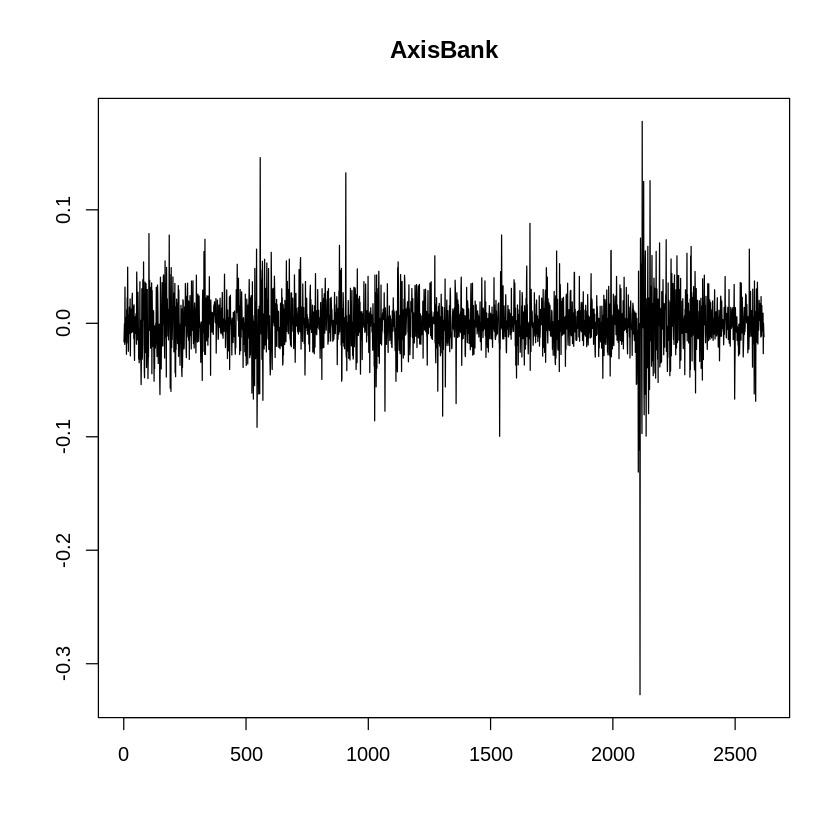

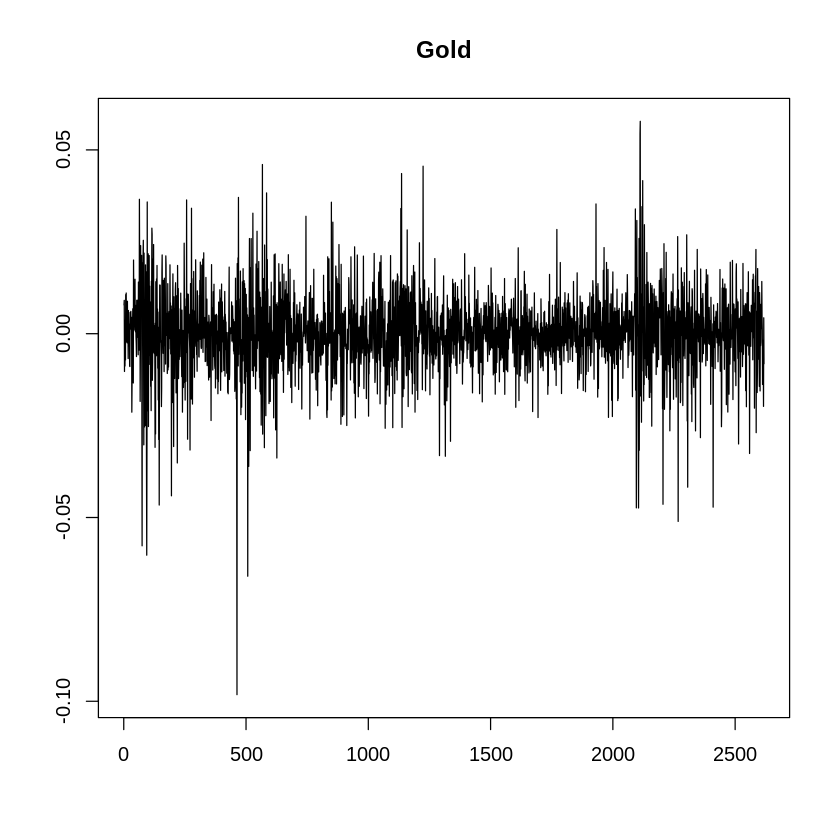

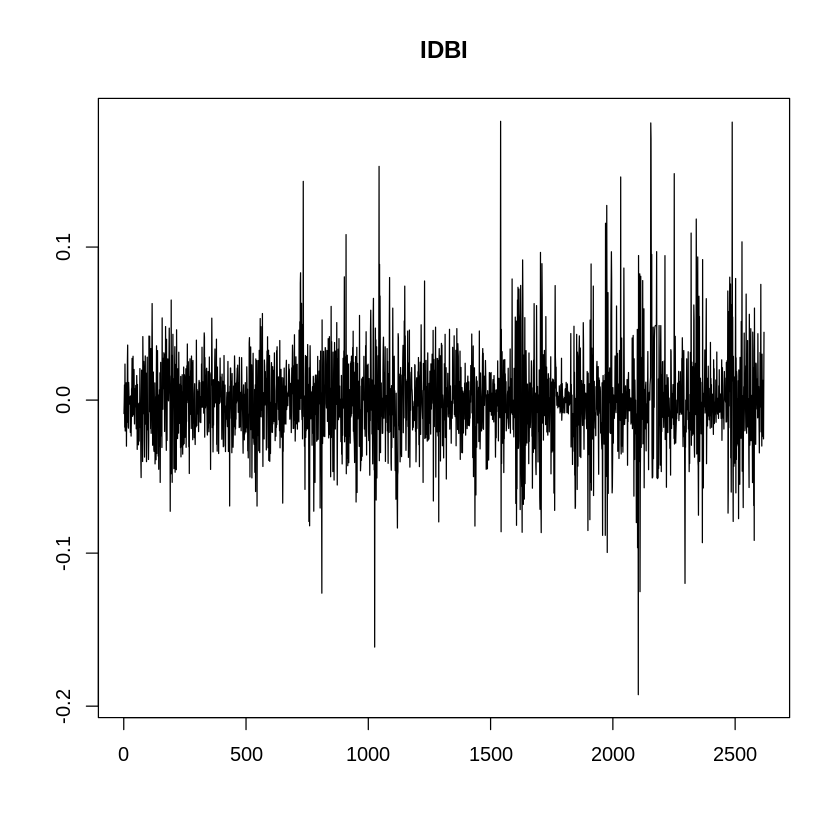

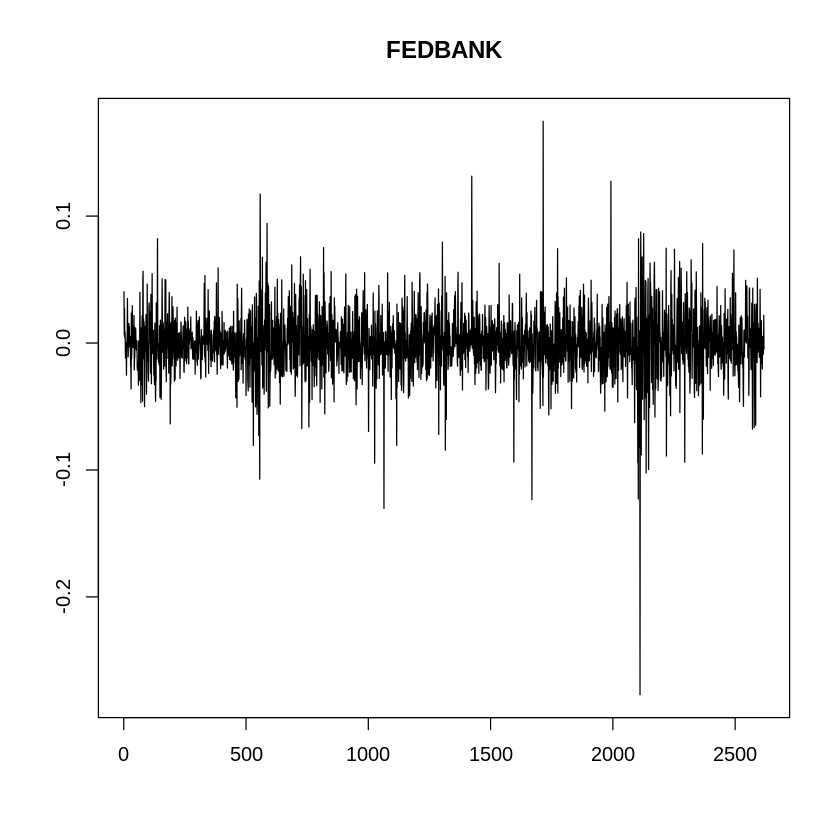

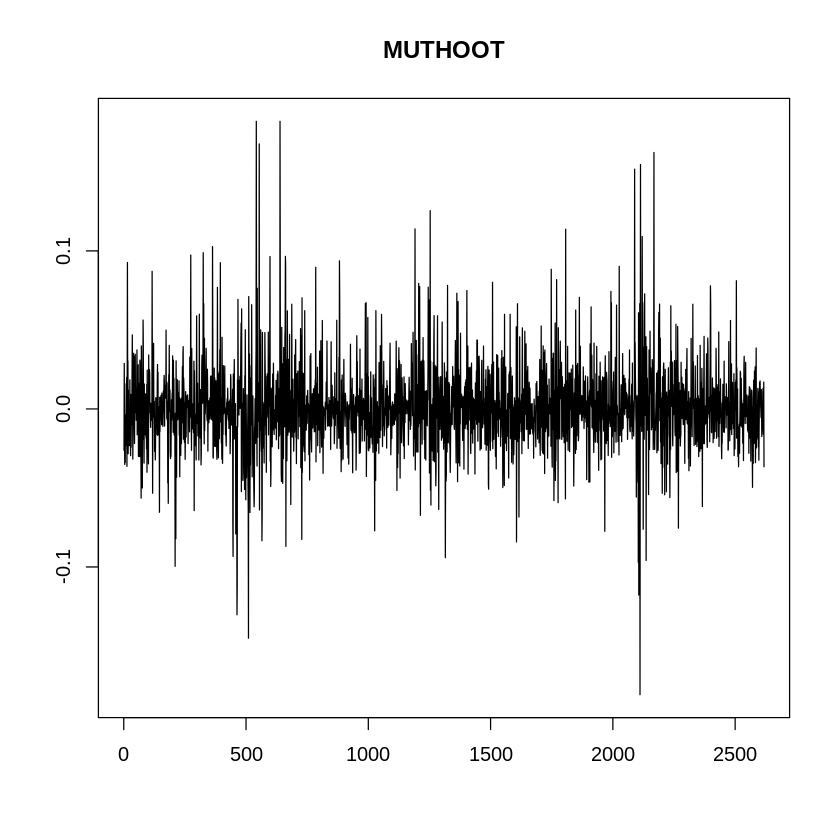

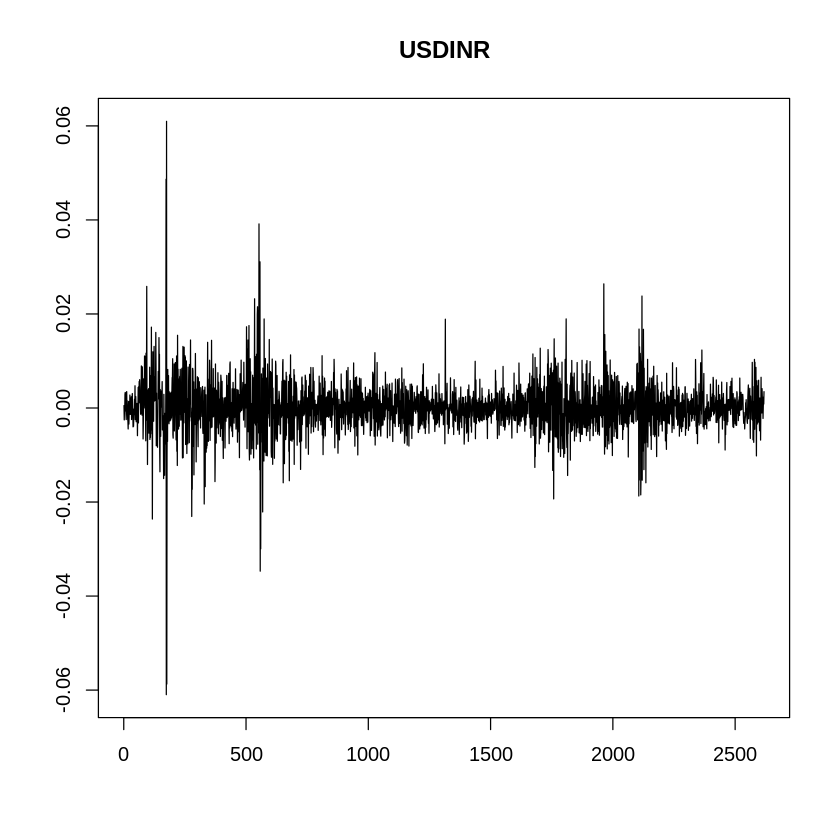

In [117]:
layout(matrix(1:5, nrow = 1, ncol = 1))
plot.ts(master_returns$AXISBANK.NS.Adjusted, main = "AxisBank", ylab = "", xlab = "")
plot.ts(master_returns$GC.F.Adjusted, main = "Gold", ylab = "", xlab = "")
plot.ts(master_returns$IDBI.NS.Adjusted, main = "IDBI", ylab = "", xlab = "")
plot.ts(master_returns$FEDERALBNK.NS.Adjusted, main = "FEDBANK", ylab = "", xlab = "")
plot.ts(master_returns$MUTHOOTFIN.NS.Adjusted, main = "MUTHOOT", ylab = "", xlab = "")
plot.ts(master_returns$INR.X.Adjusted, main = "USDINR", ylab = "", xlab = "")

In [118]:

par(mar=c(0,0,0,0))
VARselect(master_returns, lag.max = 30, type = "const")



,1,2,3,4,5,6,7,8,9,10,⋯,21,22,23,24,25,26,27,28,29,30
AIC(n),-4.971306e+01,-4.971636e+01,-4.970176e+01,-4.969075e+01,-4.967672e+01,-4.966425e+01,-4.965070e+01,-4.963938e+01,-4.962828e+01,-4.961401e+01,⋯,-4.952134e+01,-4.950650e+01,-4.949075e+01,-4.948619e+01,-4.946977e+01,-4.945106e+01,-4.943912e+01,-4.942132e+01,-4.940715e+01,-4.939057e+01
HQ(n),-4.967861e+01,-4.965237e+01,-4.960823e+01,-4.956769e+01,-4.952412e+01,-4.948212e+01,-4.943904e+01,-4.939818e+01,-4.935754e+01,-4.931374e+01,⋯,-4.889619e+01,-4.885182e+01,-4.880652e+01,-4.877243e+01,-4.872648e+01,-4.867823e+01,-4.863675e+01,-4.858942e+01,-4.854571e+01,-4.849960e+01
SC(n),-4.961798e+01,-4.953978e+01,-4.944369e+01,-4.935119e+01,-4.925566e+01,-4.916170e+01,-4.906665e+01,-4.897383e+01,-4.888123e+01,-4.878547e+01,⋯,-4.779635e+01,-4.770001e+01,-4.760276e+01,-4.751670e+01,-4.741879e+01,-4.731858e+01,-4.722515e+01,-4.712586e+01,-4.703019e+01,-4.693211e+01
FPE(n),2.569752e-22,2.561301e-22,2.598967e-22,2.627734e-22,2.664876e-22,2.698325e-22,2.735151e-22,2.766325e-22,2.797238e-22,2.837466e-22,⋯,3.114290e-22,3.161072e-22,3.211528e-22,3.226477e-22,3.280181e-22,3.342468e-22,3.382980e-22,3.444117e-22,3.493714e-22,3.552589e-22


,Estimate,Std. Error,t value,Pr(>|t|)
AXISBANK.NS.Adjusted.l1,0.0518488452,0.0242413863,2.13885644,0.032540101
GC.F.Adjusted.l1,0.0475965838,0.0431959339,1.10187649,0.270617244
IDBI.NS.Adjusted.l1,-0.0238399741,0.0178806723,-1.33328175,0.182556028
FEDERALBNK.NS.Adjusted.l1,0.0153973173,0.0242119038,0.63593996,0.524871460
MUTHOOTFIN.NS.Adjusted.l1,-0.0043641929,0.0187836517,-0.23233996,0.816292241
INR.X.Adjusted.l1,0.0731039903,0.0905707338,0.80714804,0.419654941
AXISBANK.NS.Adjusted.l2,0.0008741224,0.0246305874,0.03548930,0.971692297
GC.F.Adjusted.l2,0.0054714623,0.0439681686,0.12444144,0.900975371
IDBI.NS.Adjusted.l2,0.0014087301,0.0179207524,0.07860887,0.937349772
FEDERALBNK.NS.Adjusted.l2,-0.0449046034,0.0241100847,-1.86248219,0.062647737



VAR Estimation Results:
Endogenous variables: AXISBANK.NS.Adjusted, GC.F.Adjusted, IDBI.NS.Adjusted, FEDERALBNK.NS.Adjusted, MUTHOOTFIN.NS.Adjusted, INR.X.Adjusted 
Deterministic variables: const 
Sample size: 2616 
Log Likelihood: 42881.669 
Roots of the characteristic polynomial:
0.294 0.2766 0.2513 0.2513 0.2295 0.2295 0.2151 0.2151 0.2021 0.2021 0.2008 0.2008
Call:
VAR(y = master_returns, p = 2, type = "const")


Estimation results for equation AXISBANK.NS.Adjusted: 
AXISBANK.NS.Adjusted = AXISBANK.NS.Adjusted.l1 + GC.F.Adjusted.l1 + IDBI.NS.Adjusted.l1 + FEDERALBNK.NS.Adjusted.l1 + MUTHOOTFIN.NS.Adjusted.l1 + INR.X.Adjusted.l1 + AXISBANK.NS.Adjusted.l2 + GC.F.Adjusted.l2 + IDBI.NS.Adjusted.l2 + FEDERALBNK.NS.Adjusted.l2 + MUTHOOTFIN.NS.Adjusted.l2 + INR.X.Adjusted.l2 + const 

                            Estimate Std. Error t value Pr(>|t|)   
AXISBANK.NS.Adjusted.l1    0.0518488  0.0242414   2.139  0.03254 * 
GC.F.Adjusted.l1           0.0475966  0.0431959   1.102  0.27062   
ID

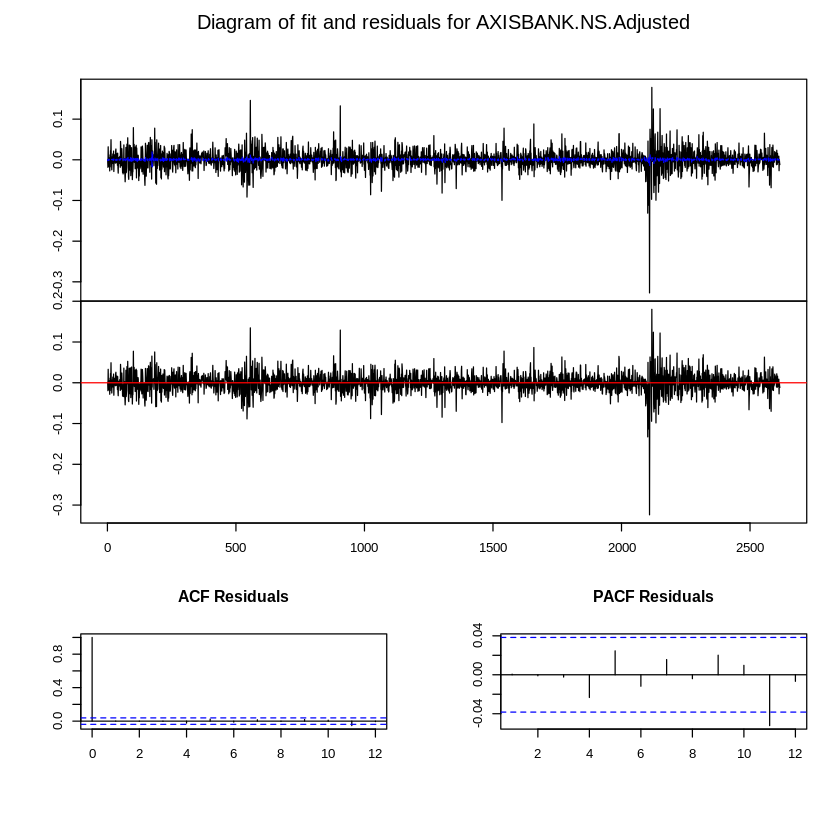

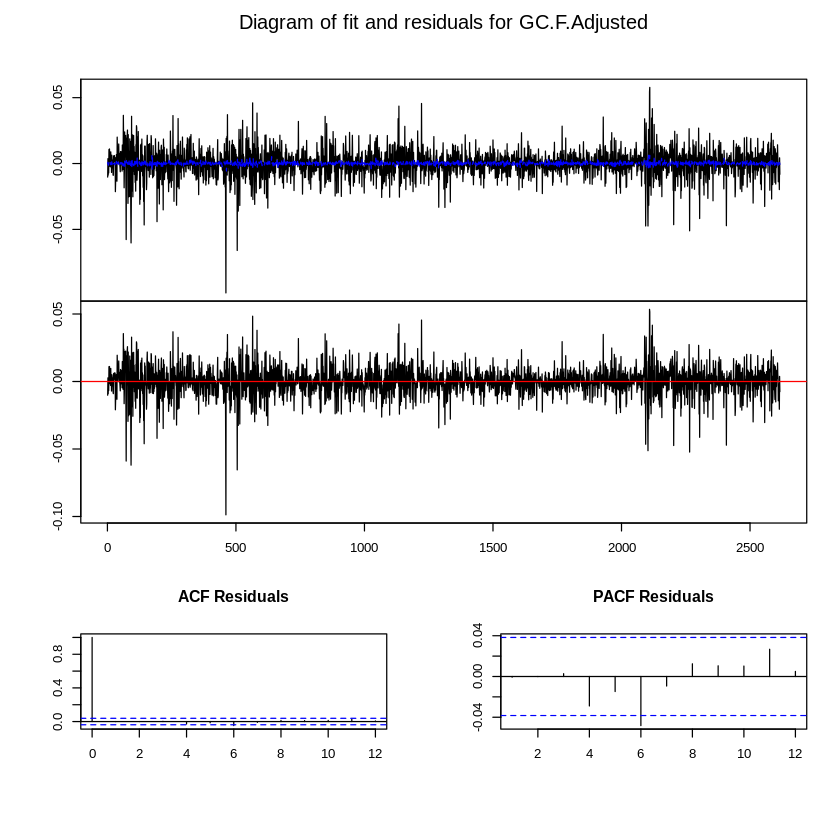

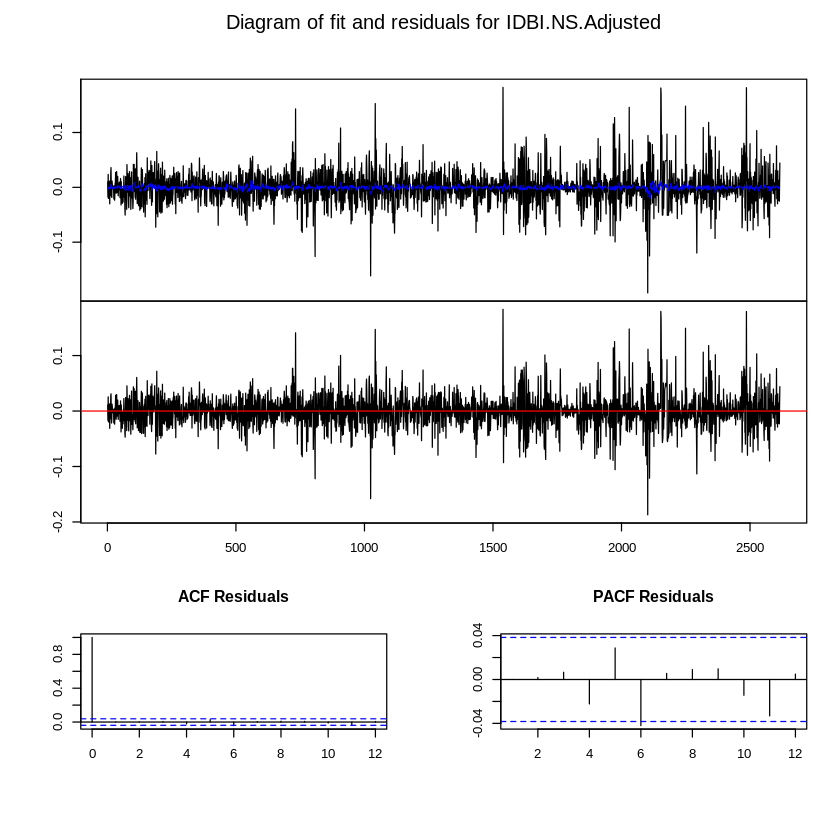

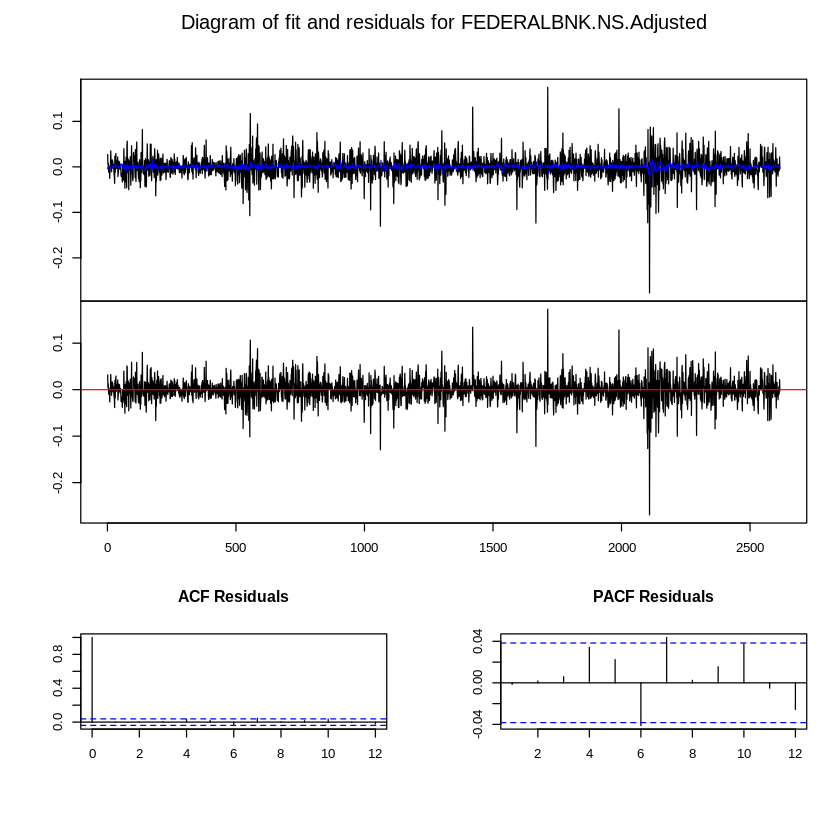

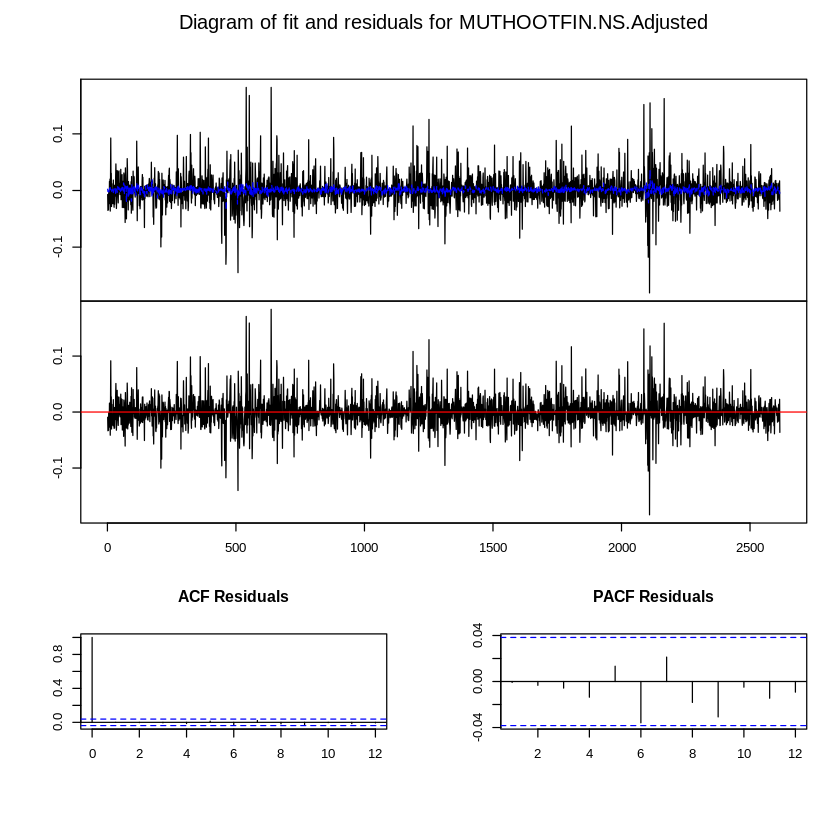

[1] 0.2939921 0.2766075 0.2513081 0.2513081 0.2295342 0.2295342 0.2151337
 [8] 0.2151337 0.2020661 0.2020661 0.2008059 0.2008059

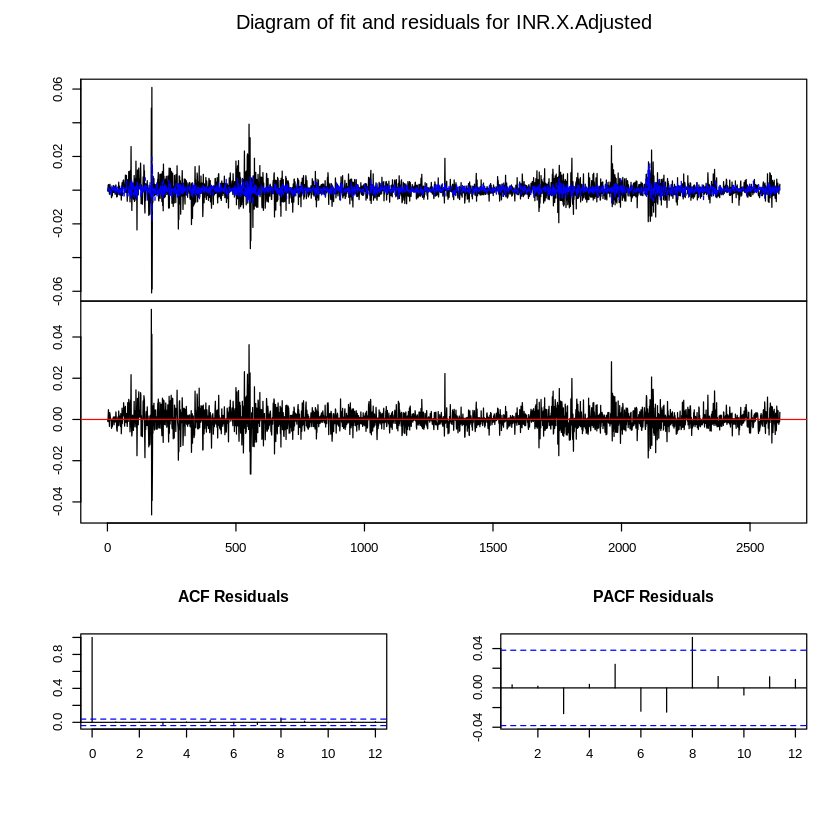

In [119]:
var1 <- VAR(master_returns, p = 2, type = "const")
coef(var1)
summary(var1)
par(mfrow = c(1,1))
plot(var1)
roots(var1)

In [120]:
var1_rest <- restrict(var1, method = "ser", thresh = 2)
var1_rest$restrictions
rowSums(var1_rest$restrictions)
Bcoef(var1_rest)
Acoef(var1_rest)

,AXISBANK.NS.Adjusted.l1,GC.F.Adjusted.l1,IDBI.NS.Adjusted.l1,FEDERALBNK.NS.Adjusted.l1,MUTHOOTFIN.NS.Adjusted.l1,INR.X.Adjusted.l1,AXISBANK.NS.Adjusted.l2,GC.F.Adjusted.l2,IDBI.NS.Adjusted.l2,FEDERALBNK.NS.Adjusted.l2,MUTHOOTFIN.NS.Adjusted.l2,INR.X.Adjusted.l2,const
AXISBANK.NS.Adjusted,1,0,0,0,0,0,0,0,0,1,0,1,0
GC.F.Adjusted,0,0,0,0,0,0,0,0,0,0,1,0,0
IDBI.NS.Adjusted,1,0,0,0,0,0,1,0,0,0,0,0,0
FEDERALBNK.NS.Adjusted,1,0,1,0,0,0,0,0,0,1,0,1,0
MUTHOOTFIN.NS.Adjusted,0,1,0,0,0,0,0,1,0,0,0,0,0
INR.X.Adjusted,1,1,1,1,0,1,1,1,0,0,0,0,1


AXISBANK.NS.Adjusted          GC.F.Adjusted       IDBI.NS.Adjusted 
                     3                      1                      2 
FEDERALBNK.NS.Adjusted MUTHOOTFIN.NS.Adjusted         INR.X.Adjusted 
                     4                      2                      8

,AXISBANK.NS.Adjusted.l1,GC.F.Adjusted.l1,IDBI.NS.Adjusted.l1,FEDERALBNK.NS.Adjusted.l1,MUTHOOTFIN.NS.Adjusted.l1,INR.X.Adjusted.l1,AXISBANK.NS.Adjusted.l2,GC.F.Adjusted.l2,IDBI.NS.Adjusted.l2,FEDERALBNK.NS.Adjusted.l2,MUTHOOTFIN.NS.Adjusted.l2,INR.X.Adjusted.l2,const
AXISBANK.NS.Adjusted,0.04617370,0.00000000,0.00000000,0.00000000,0,0.0000000,0.00000000,0.00000000,0,-0.04391972,0.00000000,-0.2541585,0.0000000000
GC.F.Adjusted,0.00000000,0.00000000,0.00000000,0.00000000,0,0.0000000,0.00000000,0.00000000,0,0.00000000,0.02715733,0.0000000,0.0000000000
IDBI.NS.Adjusted,0.07163874,0.00000000,0.00000000,0.00000000,0,0.0000000,0.06569667,0.00000000,0,0.00000000,0.00000000,0.0000000,0.0000000000
FEDERALBNK.NS.Adjusted,0.12419662,0.00000000,-0.04540880,0.00000000,0,0.0000000,0.00000000,0.00000000,0,-0.06130726,0.00000000,-0.2050350,0.0000000000
MUTHOOTFIN.NS.Adjusted,0.00000000,0.33246585,0.00000000,0.00000000,0,0.0000000,0.00000000,0.10149681,0,0.00000000,0.00000000,0.0000000,0.0000000000
INR.X.Adjusted,-0.04512620,-0.07079227,-0.01312904,-0.01516136,0,-0.2666032,-0.01626810,-0.01962036,0,0.00000000,0.00000000,0.0000000,0.0003001798


,AXISBANK.NS.Adjusted.l1,GC.F.Adjusted.l1,IDBI.NS.Adjusted.l1,FEDERALBNK.NS.Adjusted.l1,MUTHOOTFIN.NS.Adjusted.l1,INR.X.Adjusted.l1
AXISBANK.NS.Adjusted,0.04617370,0.00000000,0.00000000,0.00000000,0,0.0000000
GC.F.Adjusted,0.00000000,0.00000000,0.00000000,0.00000000,0,0.0000000
IDBI.NS.Adjusted,0.07163874,0.00000000,0.00000000,0.00000000,0,0.0000000
FEDERALBNK.NS.Adjusted,0.12419662,0.00000000,-0.04540880,0.00000000,0,0.0000000
MUTHOOTFIN.NS.Adjusted,0.00000000,0.33246585,0.00000000,0.00000000,0,0.0000000
INR.X.Adjusted,-0.04512620,-0.07079227,-0.01312904,-0.01516136,0,-0.2666032
,AXISBANK.NS.Adjusted.l2,GC.F.Adjusted.l2,IDBI.NS.Adjusted.l2,FEDERALBNK.NS.Adjusted.l2,MUTHOOTFIN.NS.Adjusted.l2,INR.X.Adjusted.l2
AXISBANK.NS.Adjusted,0.00000000,0.00000000,0,-0.04391972,0.00000000,-0.2541585
GC.F.Adjusted,0.00000000,0.00000000,0,0.00000000,0.02715733,0.0000000
IDBI.NS.Adjusted,0.06569667,0.00000000,0,0.00000000,0.00000000,0.0000000


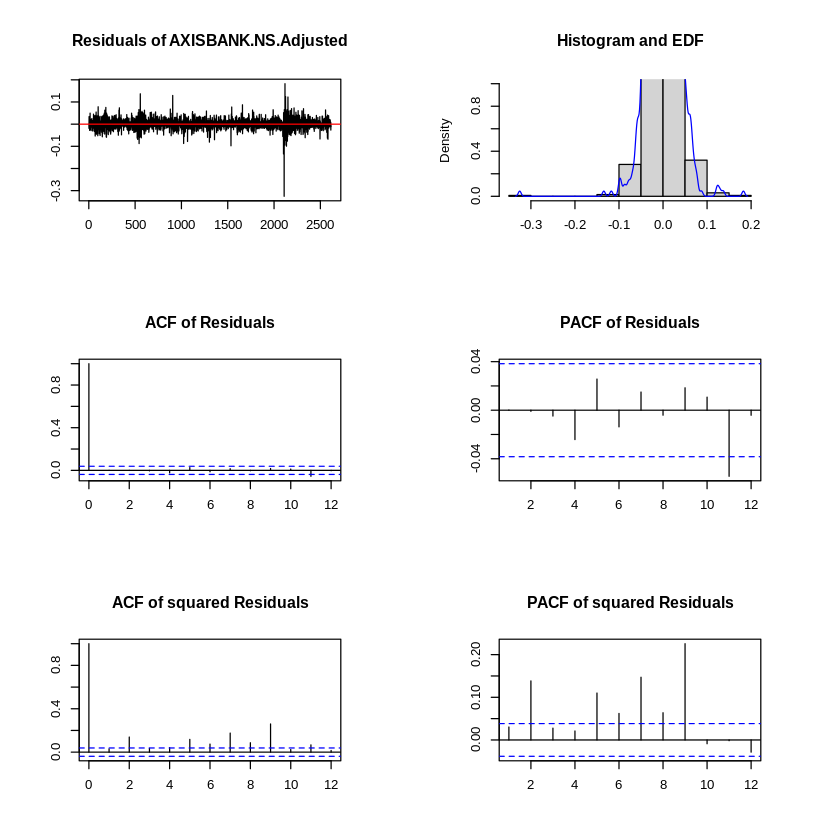

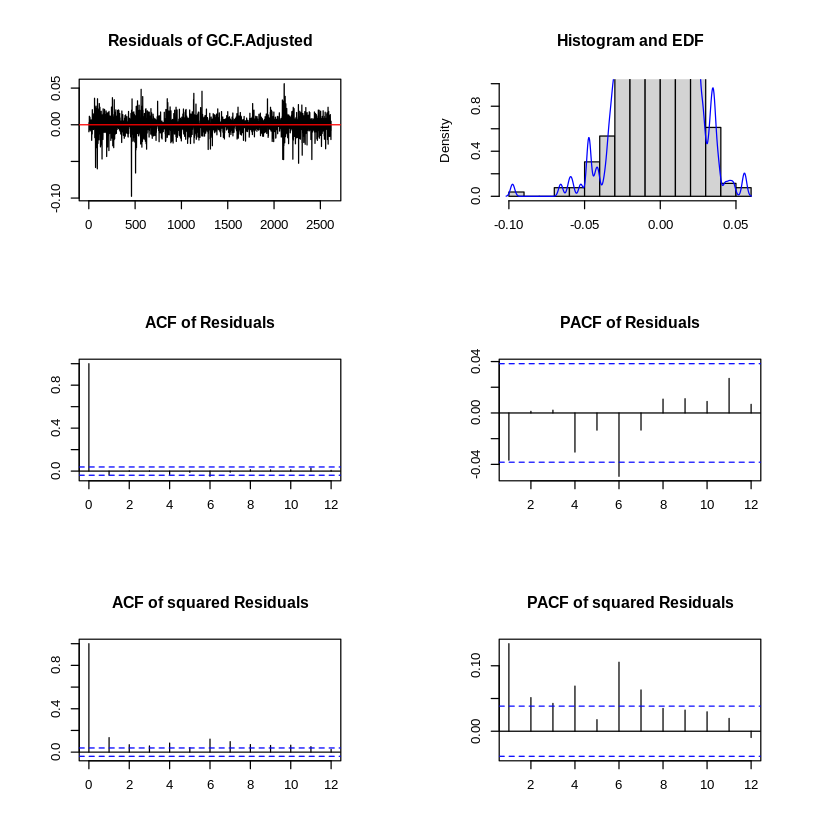

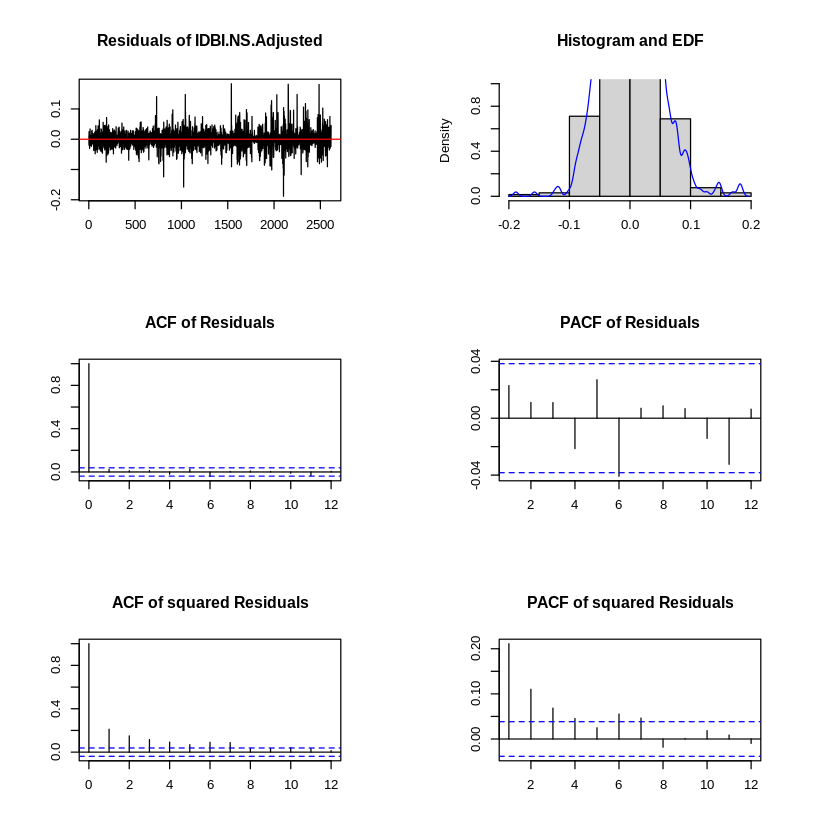

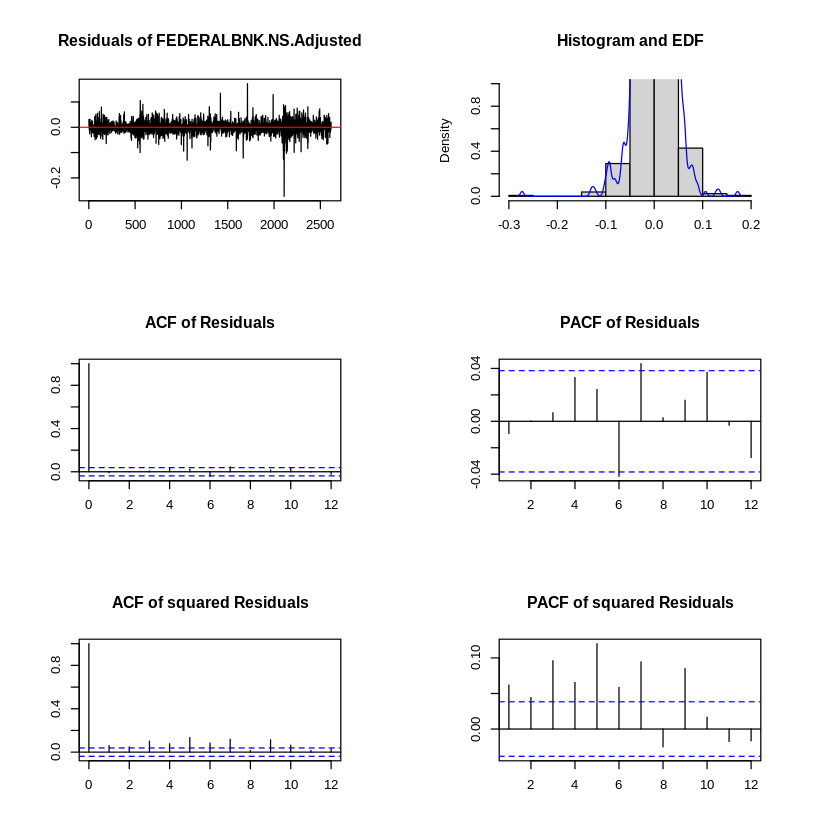

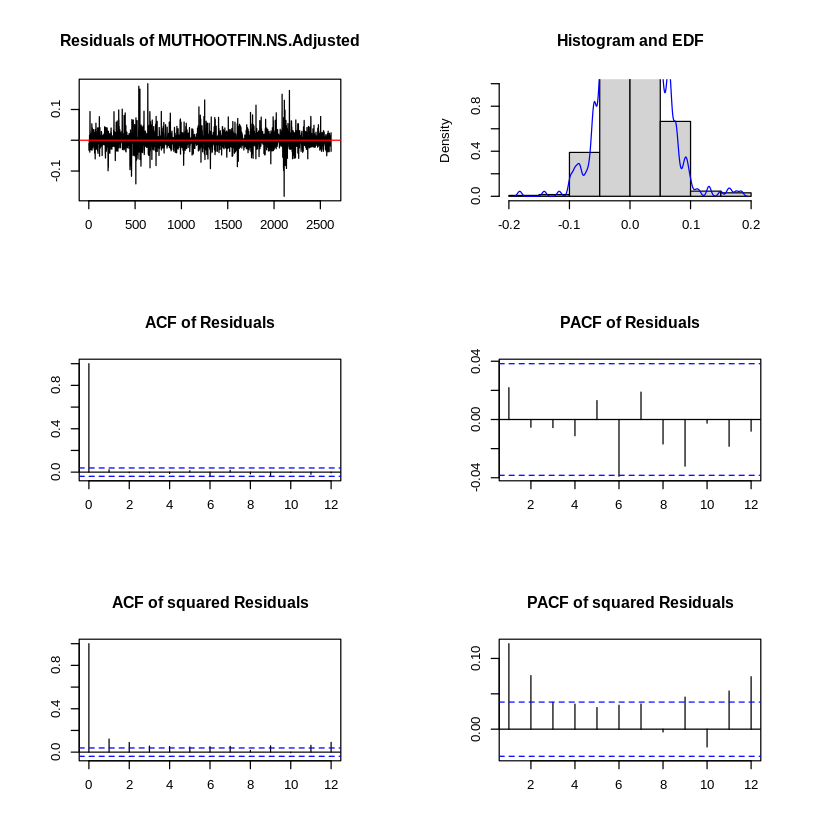

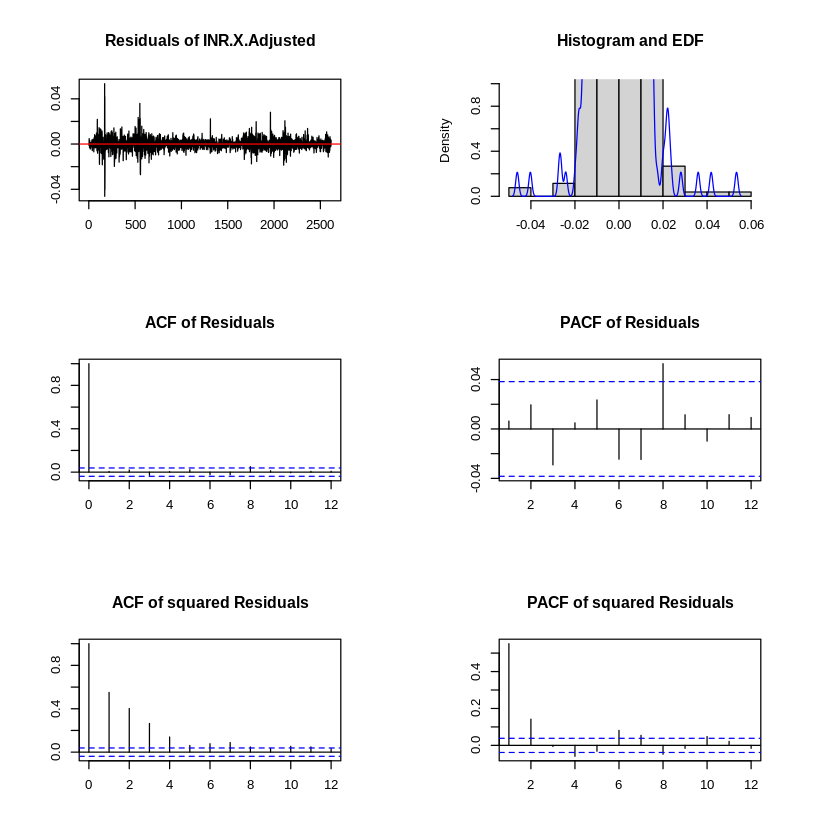

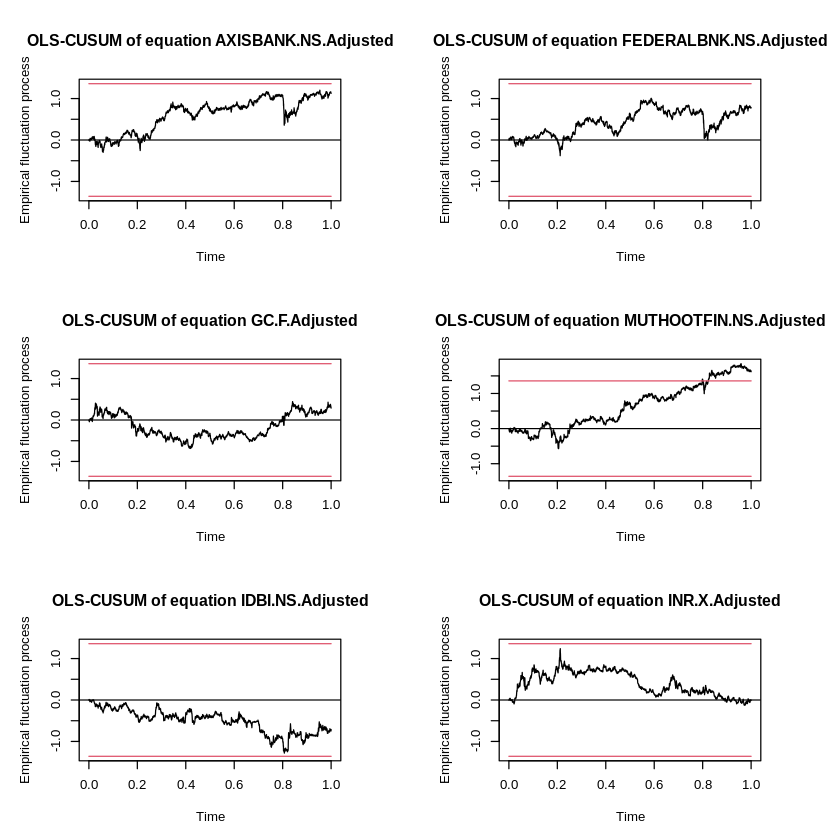

In [121]:
par(mar = c(5,5,5,5))
var1_rest.arch <- arch.test(var1_rest)
var1_rest.norm <- normality.test(var1_rest, multivariate.only = TRUE)
plot(var1_rest.norm)
var1_rest.pt.asy <- serial.test(var1_rest, lags.pt = 10, type = "PT.asymptotic")
var1_rest.pt.adj <- serial.test(var1_rest, lags.pt = 10, type = "PT.adjusted")
var1_rest.BG <- serial.test(var1_rest, lags.pt = 10, type = "BG")
var1_rest.ES <- serial.test(var1_rest, lags.pt = 10, type = "ES")
var1.stab <- stability(var1_rest, type = "OLS-CUSUM")
plot(var1.stab)

In [122]:
y4<-c()
numrows <-nrow(master_returns)
for (i in 1:1000) {
  
  var1 <- VAR(master_returns[(i:(i+numrows-1001)),], p = 5, type = "const")
  forecasts <- predict(var1)
  y<-forecasts$fcst$AXISBANK.NS.Adjusted[1,1]
  y4<-c(y4,y)
}

RMSE(y4,tail(master_returns$AXISBANK.NS.Adjusted,1000))


[1] 0.02666594

In [123]:
# Forecasting with Machine Learning

B_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$AXISBANK.NS.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(B_Lag)<-paste0("ICICI_",1:10)
G_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$GC.F.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(G_Lag)<-paste0("TreasuryYield_",1:10)
F_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$FEDERALBNK.NS.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(F_Lag)<-paste0("FEDBANK_",1:10)
I_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$IDBI.NS.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(I_Lag)<-paste0("IDBI_",1:10)
U_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$INR.X.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(U_Lag)<-paste0("USDINR_",1:10)
master2<-cbind(as.data.frame(master_returns),B_Lag,G_Lag,F_Lag,I_Lag,U_Lag)
master2<-na.omit(master2)

In [124]:
numrows<-nrow(master2)
traindata<-master2[1:(numrows-1000),]
testdata<-master2[(numrows-999):(numrows),]

In [125]:
# Multiple Linear Regression Model
model4<-caret::train(AXISBANK.NS.Adjusted~., data = traindata, method = "lm",
                     preProcess = c("YeoJohnson","pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model4,testdata)
RMSE(pred,tail(master_returns$AXISBANK.NS.Adjusted,1000)) 

[1] 0.02229707

In [126]:
model5<-caret::train(AXISBANK.NS.Adjusted~., data = traindata, method = "svmLinear3",
                     preProcess = c("pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model5,testdata)
RMSE(pred,tail(master_returns$AXISBANK.NS.Adjusted,1000)) 

Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided

[1] 0.02501664

In [127]:
model6<-caret::train(AXISBANK.NS.Adjusted~., data = traindata, method = "ranger",
                     #preProcess = c("pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model6,testdata)
RMSE(pred,tail(master_returns$AXISBANK.NS.Adjusted,1000)) 

[1] 0.02236224

In [129]:
# Gradient Boosting Model

model7<-caret::train(AXISBANK.NS.Adjusted~., data = traindata, method = "xgbLinear",
                     #preProcess = c("pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model7,testdata)
RMSE(pred,tail(master_returns$AXISBANK.NS.Adjusted,1000))

[1] 0.02412808